# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- **Nama:** [Mohammad Iqbal Firdaus]
- **Email:** [bangiqballah@gmail.com]
- **ID Dicoding:** [em1cia]

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import joblib
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


### Menyiapkan data yang akan diguankan

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data/data.csv", sep=";")

# Tampilkan 5 baris pertama
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [4]:
# Melihat informasi awal
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [5]:
df. describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Dataset ini terdiri dari 37 fitur dan 4424 baris data. Berikut adalah penjelasan dari tiap kolom/fitur tersebut.

| Column name | Description |
| --- | --- |
|Marital status | Status pernikahan siswa. (kategorikal) 1 – Lajang; 2 – Nikah; 3 – Duda; 4 – Cerai; 5 –Bersama tanpa ikatan resmi; 6 – Terpisah secara resmi |
| Application mode | Metode masuk perguruan tinggi yang digunakan oleh siswa. (kategorikal) 1 - Tahap pertama - kontingen umum; 2 - Peraturan No. 612/93; 5 - Tahap pertama - kontingen khusus (Pulau Azores); 7 - Pemegang kursus tinggi lainnya; 10 - Peraturan No. 854-B/99; 15 - Mahasiswa internasional (sarjana); 16 - Tahap pertama - kontingen khusus (Pulau Madeira); 17 - Tahap kedua - kontingen umum; 18 - Tahap ketiga - kontingen umum; 26 - Peraturan No. 533-A/99, item b2) (Rencana Berbeda); 27 - Peraturan No. 533-A/99, item b3 (Lembaga Lain); 39 - Berusia di atas 23 tahun; 42 - Transfer; 43 - Perubahan jurusan; 44 - Pemegang diploma spesialisasi teknologi; 51 - Perubahan institusi/jurusan; 53 - Pemegang diploma siklus pendek; 57 - Perubahan institusi/jurusan (Internasional)|
|Application order | Urutan di mana siswa mendaftar (Numerikal) Application order (Antara 0 - pilihan pertama; dan 9 pilihan terakhir) |
|Course | Mata kuliah yang diambil oleh siswa. (Kategoris); 33 - Teknologi Produksi Bahan Bakar Nabati; 171 - Desain Animasi dan Multimedia; 8014 - Layanan Sosial (kehadiran malam); 9003 - Agronomi; 9070 - Desain Komunikasi; 9085 - Perawatan Hewan; 9119 - Teknik Informatika; 9130 - Peternakan Kuda; 9147 - Manajemen; 9238 - Layanan Sosial; 9254 - Pariwisata; 9500 - Keperawatan; 9556 - Kesehatan Gigi; 9670 - Manajemen Periklanan dan Pemasaran; 9773 - Jurnalisme dan Komunikasi; 9853 - Pendidikan Dasar; 9991 - Manajemen (kehadiran malam)|
|Daytime/evening attendance | Apakah siswa menghadiri kelas siang atau malam. (Kategoris) 1 - siang; 0 - malam |
|Previous qualification| Kualifikasi yang diperoleh oleh siswa sebelum mendaftar di perguruan tinggi. (Kategoris) 1 - Pendidikan Sekunder; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi pendidikan tinggi; 9 - Tahun ke-12 sekolah - tidak selesai; 10 - Tahun ke-11 sekolah - tidak selesai; 12 - Lainnya - Tahun ke-11 sekolah; 14 - Tahun ke-10 sekolah; 15 - Tahun ke-10 sekolah - tidak selesai; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2) |
|Previous qualification (grade) | Nilai dari kualifikasi sebelumnya (antara 0 dan 200) |
|Nacionality |  Kebangsaan siswa. (Kategoris) 1 - Portugis; 2 - Jerman; 6 - Spanyol; 11 - Italia; 13 - Belanda; 14 - Inggris; 17 - Lithuania; 21 - Angola; 22 - Cape Verde; 24 - Guinea; 25 - Mozambik; 26 - Santomean; 32 - Turki; 41 - Brasil; 62 - Rumania; 100 - Moldova (Republik); 101 - Meksiko; 103 - Ukraina; 105 - Rusia; 108 - Kuba; 109 - Kolombia |
|Mother's qualification | Kualifikasi ibu siswa. (Kategoris) 1 - Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi Pendidikan Tinggi; 9 - Tahun ke-12 sekolah - Tidak Selesai; 10 - Tahun ke-11 sekolah - Tidak Selesai; 11 - Tahun ke-7 (Lama); 12 - Lainnya - Tahun ke-11 sekolah; 14 - Tahun ke-10 sekolah; 18 - Kursus Perdagangan Umum; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 22 - Kursus Teknis-Profesional; 26 - Tahun ke-7 sekolah; 27 - Siklus 2 kursus SMA umum; 29 - Tahun ke-9 sekolah - Tidak Selesai; 30 - Tahun ke-8 sekolah; 34 - Tidak diketahui; 35 - Tidak bisa membaca atau menulis; 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah; 37 - Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 41 - Kursus Studi Tinggi Khusus; 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2); 44 - Pendidikan Tinggi - gelar doktor (Siklus 3) |
|Father's qualification | Kualifikasi ayah siswa. (Kategoris) 1 - Pendidikan Sekunder - Tahun ke-12 sekolah atau Setara; 2 - Pendidikan Tinggi - gelar sarjana; 3 - Pendidikan Tinggi - gelar; 4 - Pendidikan Tinggi - gelar magister; 5 - Pendidikan Tinggi - gelar doktor; 6 - Frekuensi Pendidikan Tinggi; 9 - Tahun ke-12 sekolah - Tidak Selesai; 10 - Tahun ke-11 sekolah - Tidak Selesai; 11 - Tahun ke-7 (Lama); 12 - Lainnya - Tahun ke-11 sekolah; 13 - Kursus SMA komplementer tahun ke-2; 14 - Tahun ke-10 sekolah; 18 - Kursus Perdagangan Umum; 19 - Pendidikan Dasar Siklus 3 (Tahun ke-9/10/11) atau setara; 20 - Kursus SMA Komplementer; 22 - Kursus Teknis-Profesional; 25 - Kursus SMA Komplementer - tidak selesai; 26 - Tahun ke-7 sekolah; 27 - Siklus 2 kursus SMA umum; 29 - Tahun ke-9 sekolah - Tidak Selesai; 30 - Tahun ke-8 sekolah; 31 - Umum Administrasi dan Kursus Perdagangan; 33 - Akuntansi Tambahan dan Administrasi; 34 - Tidak diketahui; 35 - Tidak bisa membaca atau menulis; 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah; 37 - Pendidikan Dasar Siklus 1 (Tahun ke-4/5) atau setara; 38 - Pendidikan Dasar Siklus 2 (Tahun ke-6/7/8) atau setara; 39 - Kursus Spesialisasi Teknologi; 40 - Pendidikan Tinggi - gelar (Siklus 1); 41 - Kursus Studi Tinggi Khusus; 42 - Kursus Teknis Tinggi Profesional; 43 - Pendidikan Tinggi - gelar magister (Siklus 2); 44 - Pendidikan Tinggi - gelar doktor (Siklus 3) |
| Mother's occupation | Pekerjaan ibu siswa. (Kategoris) 0 - Siswa 1 - Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf Administrasi 5 - Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual 6 - Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Tenaga Kerja Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lainnya 99 - (kosong) 122 - Profesional Kesehatan 123 - Guru 125 - Spesialis dalam teknologi informasi dan komunikasi (TIK) 131 - Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik 132 - Teknisi dan Profesional, tingkat menengah dari kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya 141 - Pekerja kantor, sekretaris umum, dan operator pengolahan data 143 - Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi 144 - Staf dukungan administratif lainnya 151 - Pekerja layanan personal 152 - Penjual 153 - Pekerja perawatan pribadi dan sejenisnya 171 - Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik 173 - Tenaga kerja terampil dalam percetakan, pembuatan instrumen presisi, perhiasan, pengrajin, dan sejenisnya 175 - Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya 191 - Pekerja pembersihan 192 - Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan 193 - Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi 194 - Asisten persiapan makanan |
| Father's occupation | Pekerjaan ayah siswa. (Kategoris) 0 - Siswa 1 - Wakil Kekuasaan Legislatif dan Badan Eksekutif, Direktur, Manajer Eksekutif dan Direktur 2 - Spesialis dalam Aktivitas Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf Administrasi 5 - Pelayanan Personal, Pekerja Keamanan dan Keselamatan, serta Penjual 6 - Petani dan Tenaga Kerja Terampil di Pertanian, Perikanan, dan Kehutanan 7 - Tenaga Kerja Terampil di Industri, Konstruksi, dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Tenaga Kerja Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lainnya 99 - (kosong) 101 - Perwira Angkatan Bersenjata 102 - Sersan Angkatan Bersenjata 103 - Personel Angkatan Bersenjata Lainnya 112 - Direktur Layanan Administratif dan Komersial 114 - Direktur Hotel, Restoran, Perdagangan, dan Layanan Lainnya 121 - Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait 122 - Profesional Kesehatan 123 - Guru 124 - Spesialis dalam keuangan, akuntansi, organisasi administratif, hubungan publik, dan komersial 131 - Teknisi dan Profesi Tingkat Menengah dalam Ilmu Pengetahuan dan Teknik 132 - Teknisi dan Profesional, tingkat menengah dari kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya, dan sejenisnya 135 - Teknisi Teknologi Informasi dan Komunikasi 141 - Pekerja kantor, sekretaris umum, dan operator pengolahan data 143 - Operator data, akuntansi, statistik, layanan keuangan, dan yang terkait dengan registrasi 144 - Staf dukungan administratif lainnya 151 - Pekerja layanan personal 152 - Penjual 153 - Pekerja perawatan pribadi dan sejenisnya 154 - Personil layanan perlindungan dan keamanan 161 - Petani berorientasi pasar dan tenaga kerja pertanian terampil dan produksi hewan 163 - Petani, pemelihara hewan, nelayan, pemburu, dan pengumpul, untuk pemenuhan kebutuhan 171 - Tenaga kerja terampil dalam konstruksi dan sejenisnya, kecuali tukang listrik 172 - Tenaga kerja terampil dalam logamurgi, permesinan logam, dan sejenisnya 174 - Tenaga kerja terampil dalam listrik dan elektronika 175 - Tenaga kerja di bidang pengolahan makanan, kayu, pakaian, dan industri serta kerajinan lainnya 181 - Operator pabrik dan mesin tetap 182 - Pekerja perakitan 183 - Pengemudi kendaraan dan operator peralatan mobile 192 - Tenaga kerja tidak terampil di pertanian, produksi hewan, perikanan, dan kehutanan 193 - Tenaga kerja tidak terampil di industri ekstraktif, konstruksi, manufaktur, dan transportasi 194 - Asisten persiapan makanan 195 - Pedagang jalanan (kecuali makanan) dan penyedia layanan jalanan |
| Admission grade | Nilai masuk (antara 0 dan 200) |
| Displaced | Apakah siswa adalah orang yang terdampak. (Kategoris) 1 – ya 0 – tidak |
| Educational special needs | Apakah siswa memiliki kebutuhan pendidikan khusus. (Kategoris) 1 – ya 0 – tidak |
| Debtor | Apakah siswa adalah peminjam. (Kategoris) 1 – ya 0 – tidak |
| Tuition fees up to date | Apakah biaya kuliah siswa sudah terbayar. (Kategoris) 1 – ya 0 – tidak |
| Gender | Jenis kelamin siswa. (Kategoris) 1 – laki-laki 0 – perempuan |
| Scholarship holder | Apakah siswa adalah penerima beasiswa. (Kategoris) 1 – ya 0 – tidak |
| Age at enrollment | Usia siswa pada saat pendaftaran. (Numerik) |
| International | Apakah siswa adalah mahasiswa internasional. (Kategoris) 1 – ya 0 – tidak |
| Curricular units 1st sem (credited) | Jumlah unit kurikuler yang diakui oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (enrolled) | Jumlah unit kurikuler yang diambil oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (evaluations) | Jumlah unit kurikuler yang dievaluasi oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (approved) | Jumlah unit kurikuler yang disetujui oleh siswa di semester pertama. (Numerik) |
| Curricular units 1st sem (grade) | Jumlah unit kurikuler yang dinilai oleh siswa dan diterima pada semester pertama. (Numerik) |
| Curricular units 1st sem (without evaluations) | Jumlah unit kurikuler yang diambil oleh siswa pada semester pertama tanpa dinilai. (Numerik) |
| Curricular units 2nd sem (credited) | Jumlah unit kurikuler yang diakui oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (enrolled) | Jumlah unit kurikuler yang diambil oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (evaluations) | Jumlah unit kurikuler yang dievaluasi oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (approved) | Jumlah unit kurikuler yang disetujui atau diterima oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (grade) | Jumlah unit kurikuler yang dinilai dan diterima oleh siswa pada semester kedua. (Numerik) |
| Curricular units 2nd sem (without evaluations) | Jumlah unit kurikuler yang diambil oleh siswa pada semester kedua tanpa dinilai. (Numerik) |
| Unemployment_rate | Tingkat pengangguran, yakni persentase dari jumlah orang yang tidak memiliki pekerjaan dalam populasi tertentu. (Numerik) |
| Inflation_rate | Tingkat inflasi, yang mengukur persentase kenaikan harga barang dan jasa dalam suatu periode waktu. (Numerik) |
| GDP | Gross Domestic Product (PDB), yakni nilai total semua barang dan jasa yang dihasilkan oleh suatu negara dalam satu tahun. (Numerik) |
| Status | Apakah mahasiswa tersebut _Dropout_, _Graduate_, ataupun _Enrolled_ (kategorikal) |


## Data Preparation / Preprocessing

In [6]:
df['dropout'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
df.drop(columns='Status', inplace=True)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [7]:
X = df.drop(columns='dropout')
y = df['dropout']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Modeling

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [9]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[542  27]
 [102 214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       569
           1       0.89      0.68      0.77       316

    accuracy                           0.85       885
   macro avg       0.86      0.81      0.83       885
weighted avg       0.86      0.85      0.85       885



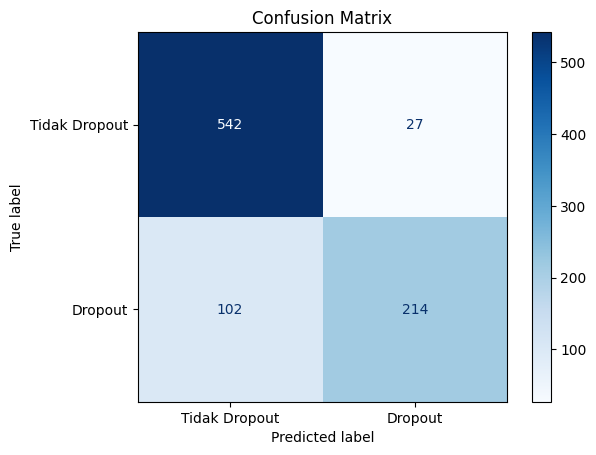

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Dropout", "Dropout"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

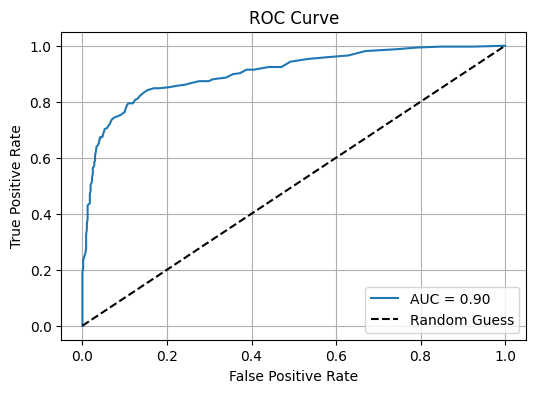

In [11]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas prediksi kelas 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


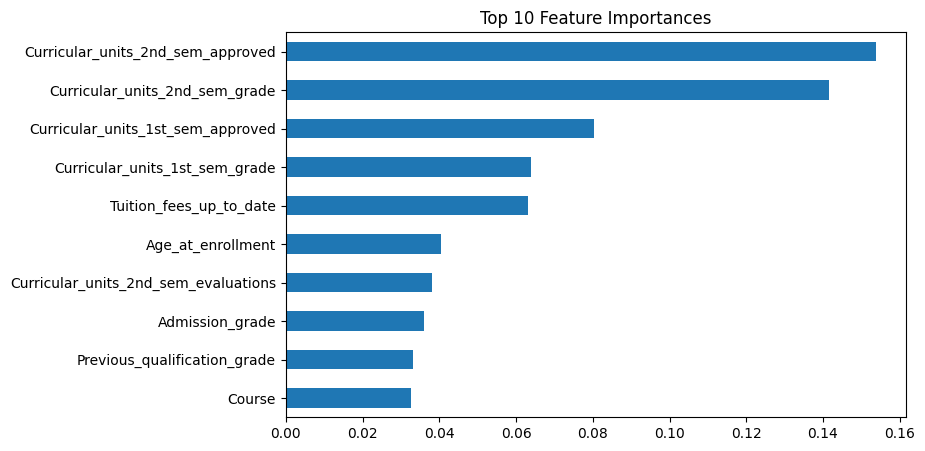

In [12]:
importances = model.feature_importances_
feature_names = X.columns

# Tampilkan 10 fitur terpenting
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh', title='Top 10 Feature Importances', figsize=(8,5))
plt.gca().invert_yaxis()
plt.show()


Grafik diatas menampilkan 10 fitur teratas yang paling penting dalam memprediksi dropout siswa. Tingginya nilai pada sumbu X menunjukkan seberapa besar pengaruh fitur tersebut terhadap prediksi.

1. Curricular_units_2nd_sem_approved: Jumlah unit kurikulum yang disetujui pada semester kedua. Ini adalah fitur yang paling dominan, menunjukkan bahwa kinerja akademik pada semester kedua sangat krusial dalam menentukan apakah siswa akan dropout atau tidak.
2. Curricular_units_2nd_sem_grade: Nilai rata-rata unit kurikulum pada semester kedua. Juga sangat penting, mengindikasikan bahwa nilai di semester kedua memiliki dampak signifikan.
3. Curricular_units_1st_sem_approved: Jumlah unit kurikulum yang disetujui pada semester pertama. Menempati posisi ketiga, menunjukkan bahwa kinerja di semester pertama juga penting.
4. Curricular_units_1st_sem_grade: Nilai rata-rata unit kurikulum pada semester pertama. Nilai di semester pertama juga merupakan indikator penting untuk menentukan siswa yang dropout.
5. Tuition_fees_up_to_date: Status pembayaran biaya kuliah. Ini menunjukkan bahwa masalah finansial (keterlambatan pembayaran) juga berkorelasi kuat dengan dropout.
6. Age_at_enrollment: Usia siswa saat pendaftaran. Usia juga memiliki pengaruh, meskipun tidak sebesar kinerja akademik.
7. Curricular_units_2nd_sem_evaluations: Jumlah evaluasi unit kurikulum pada semester kedua. Indikator lain terkait kinerja akademik di semester kedua.
8. Admission_grade: Nilai saat masuk. Nilai awal siswa juga berperan, meskipun tidak setinggi kinerja semester berjalan.
9. Previous_qualification_grade: Nilai kualifikasi sebelumnya (misalnya, nilai SMA). Ini menunjukkan latar belakang akademik juga berpengaruh.
10. Course: Jurusan/program studi. Beberapa program studi mungkin memiliki tingkat dropout yang lebih tinggi daripada yang lain.

## Kesimpulan

Berdasarkan analisis fitur importance, dapat disimpulkan bahwa faktor akademik, khususnya kinerja pada semester kedua, adalah prediktor utama (paling kuat) untuk dropout siswa di Jaya Jaya Institut. Namun, faktor finansial (biaya kuliah), usia, dan kinerja akademik pada semester pertama juga memiliki pengaruh yang signifikan.



### Rekomendasi untuk Jaya Jaya Institut dalam Mengatasi Masalah Dropout:

**Kinerja Akademik Semester 1 dan 2:**

1. Deteksi Dini dan Intervensi Cepat: Sistem deteksi dropout harus sangat sensitif terhadap perubahan dalam Curricular_units_1st_sem_grade, Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_grade, dan Curricular_units_2nd_sem_approved.
2. Bimbingan Akademik Intensif: Segera setelah semester pertama selesai, identifikasi siswa dengan nilai rendah atau unit kurikulum yang tidak disetujui. Berikan bimbingan akademik, tutoring, atau program dukungan studi.
3. Pemantauan Khusus di Semester Kedua: Pertimbangkan untuk memberikan perhatian ekstra kepada siswa di semester kedua, karena fitur terkait semester ini memiliki dampak paling besar. Mungkin ada semacam "titik kritis" di semester kedua yang perlu diidentifikasi.

**Masalah Finansial:**

Peringatan Dini Pembayaran Biaya Kuliah. Sistem harus memantau status Tuition_fees_up_to_date. Jika ada keterlambatan pembayaran, inisiatif untuk menghubungi siswa dan menawarkan solusi (misalnya, cicilan, beasiswa, atau bantuan finansial lainnya) harus segera dilakukan.
Pertimbangkan Faktor Demografi dan Awal:

- Analisis Usia saat Pendaftaran
- Evaluasi Nilai Masuk dan Kualifikasi Sebelumnya

**Analisis Berdasarkan Program Studi (Course):**

Lakukan analisis lebih lanjut untuk setiap program studi. Apakah ada program studi tertentu yang memiliki tingkat dropout yang jauh lebih tinggi? Jika ya, gali penyebabnya (misalnya, kurikulum yang terlalu berat, kurangnya dukungan, atau ketidaksesuaian minat).

In [13]:
joblib.dump(model, 'model_dropout.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']